# 1D Heisenberg J1J2J3 model: Inference

In this notebook, I load the trained models (1D Euclidean GRU & 1D Hyperbolic GRU) to generate new samples (spin configurations) whose local energies are calculated. 4 settings are considered: $J_1 = 1.0$ and $(J_2, J_3) = (0.0, 0.5), (0.2,0.2), (0.2, 0.5), (0.5, 0.2)$. The number of spins is $N=30$.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../utility')
from j1j2j3_hyprnn_train_loop import *

2025-05-23 14:30:51.641709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
def define_load_test(wf, weight_link):
    test_samples_before = wf.sample(50,2)
    #print(test_samples_before)
    test_gs_before = J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, 50, test_samples_before, True)
    
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(50,2)
    test_gs_after =  J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, 50, test_samples_after, True)
    #print(test_samples_after)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    wf.model.summary()
    print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')

In [3]:
N=30
Bz=+0.0*np.ones(N)

# J2 = 0.0, J3 = 0.5

In [18]:
J1_ = 1.0
J2_ = 0.0
J3_ = 0.5
E_00_05 = -15.890276367

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [19]:
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='results/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (10.330883026123047-0.3006024658679962j), var E = 0.6773775219917297


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (48, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-11.327160835266113-0.013875443488359451j), var E = 0.0017854362959042192


In [20]:
#Different seed leads to slightly different results, but qualitatively the results are the same 
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = 'results/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (9.700085639953613-0.48315078020095825j), var E = 2.8402252197265625


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-15.239825248718262+0.012420153245329857j), var E = 3.9035587310791016


# J2 =0.2, J3=0.2

In [21]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.2
E_02_02 =-12.94304435468

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [22]:
#default seed=111 - better result than seed = 121 in this case 
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='results/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (9.75786018371582-0.24504441022872925j), var E = 0.43094292283058167


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_1 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-10.792933464050293-0.05997410789132118j), var E = 0.908018946647644


In [24]:
#default seed=111 - better result than seed = 121 in this case 
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = 'results/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (9.292208671569824-0.40812739729881287j), var E = 2.0722179412841797


Model: "wf_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_2 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-12.206028938293457-0.2340109944343567j), var E = 2.9758431911468506


# J2 =0.2, J3=0.5

In [25]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.5
E_02_05 = -14.640825798

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [26]:
#Seed 121 is much  more accurate than seed 111 (yielding -5.5) in this case 
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50, seed = 121)
wl_gru='results/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (11.678078651428223-0.26730144023895264j), var E = 1.4860844612121582


Model: "wf_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_2 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-9.902488708496094-0.005792470183223486j), var E = 0.0008114238153211772


In [27]:
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=121)
wl_hgru = 'results/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (10.948841094970703-0.5503060817718506j), var E = 3.707106351852417


Model: "wf_model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_3 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-12.666606903076172+0.11807660013437271j), var E = 0.48654600977897644


# J2 =0.5, J3=0.2

In [28]:
J1_ = 1.0
J2_ = 0.5
J3_ = 0.2
E_05_02 =-11.528738924

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

In [29]:
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 50)
wl_gru='results/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (11.789983749389648-0.2936287522315979j), var E = 0.7149178385734558


Model: "wf_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_3 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-9.741228103637695-0.10129906982183456j), var E = 1.5470787286758423


In [30]:
wf_hgru = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 50, seed=111)
wl_hgru = 'results/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (8.070937156677246-0.5549056529998779j), var E = 6.089362144470215


Model: "wf_model_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_4 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,154 (31.85 KB)

 Trainable params: 8,154 (31.85 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-10.765935897827148+0.008982312865555286j), var E = 0.15700876712799072


# Convergence curves

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_meanE(ax, Ee, e_list, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
    
    #ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1)    
    #for i in range(len(e_list)):
    #    ax2.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    #ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    #ax2.axis(frange)
    #ax.legend(loc='best', bbox_to_anchor=legend_loc)
    ax.legend(loc='best')
    
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    
    #ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1 )
    #for i in range(len(v_list)):
    #    ax2.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    #ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    #ax2.axis(frange)
    #ax.legend(loc='best', bbox_to_anchor=legend_loc)
    ax.legend(loc='best')

In [5]:
fname = 'results'
###################################### (J2, J3) = (0.0, 0.5) #######################################
mE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE00_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh00_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.0|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.2) #######################################
mE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_50_ns=50_MsTrue_varE.npy')

mEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_50_id_hyp_ns=50_MsTrue_varE.npy')

In [6]:
E_00_05 = -15.890276367
E_02_02 = -12.943044355
E_02_05 = -14.640825798
E_05_02 = -11.528738924

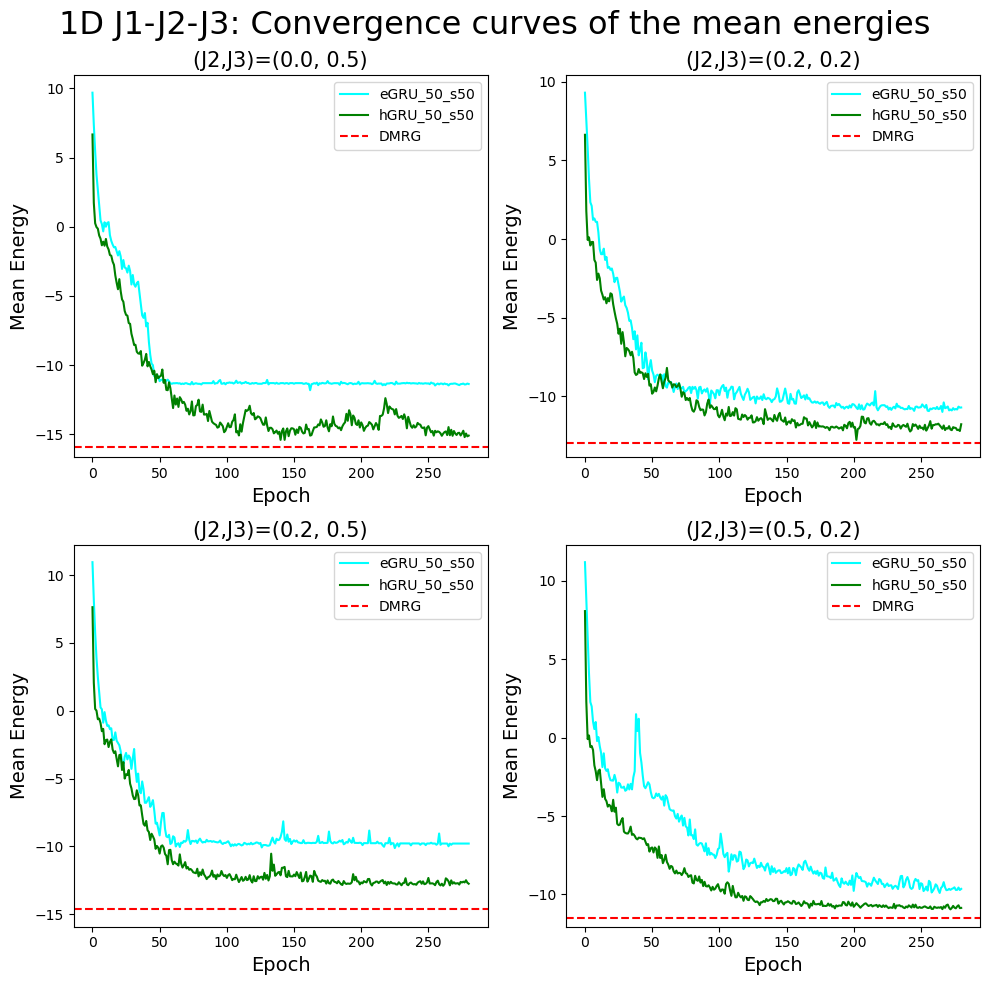

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)
e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [mE00_05, mEh00_05]
e_list02_02 = [mE02_02,  mEh02_02]
e_list02_05 = [mE02_05, mEh02_05]
e_list05_02 = [mE05_02, mEh05_02]

plot_res_meanE(ax[0,0], E_00_05, e_list00_05, e_names, [0.0, 0.5], [100,290, E_00_05-0.5, E_00_05+3.5], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[0,1], E_02_02, e_list02_02, e_names, [0.2,0.2], [100,290, E_02_02-0.2, E_02_02+3.], (0.15, 0.38, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_02_05, e_list02_05, e_names, [0.2,0.5], [100,290, E_02_05-0.5, E_02_05+4.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_05_02, e_list05_02, e_names, [0.5, 0.2], [100,290,E_05_02-0.5, E_05_02+4.5], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2-J3: Convergence curves of the mean energies', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30.png')

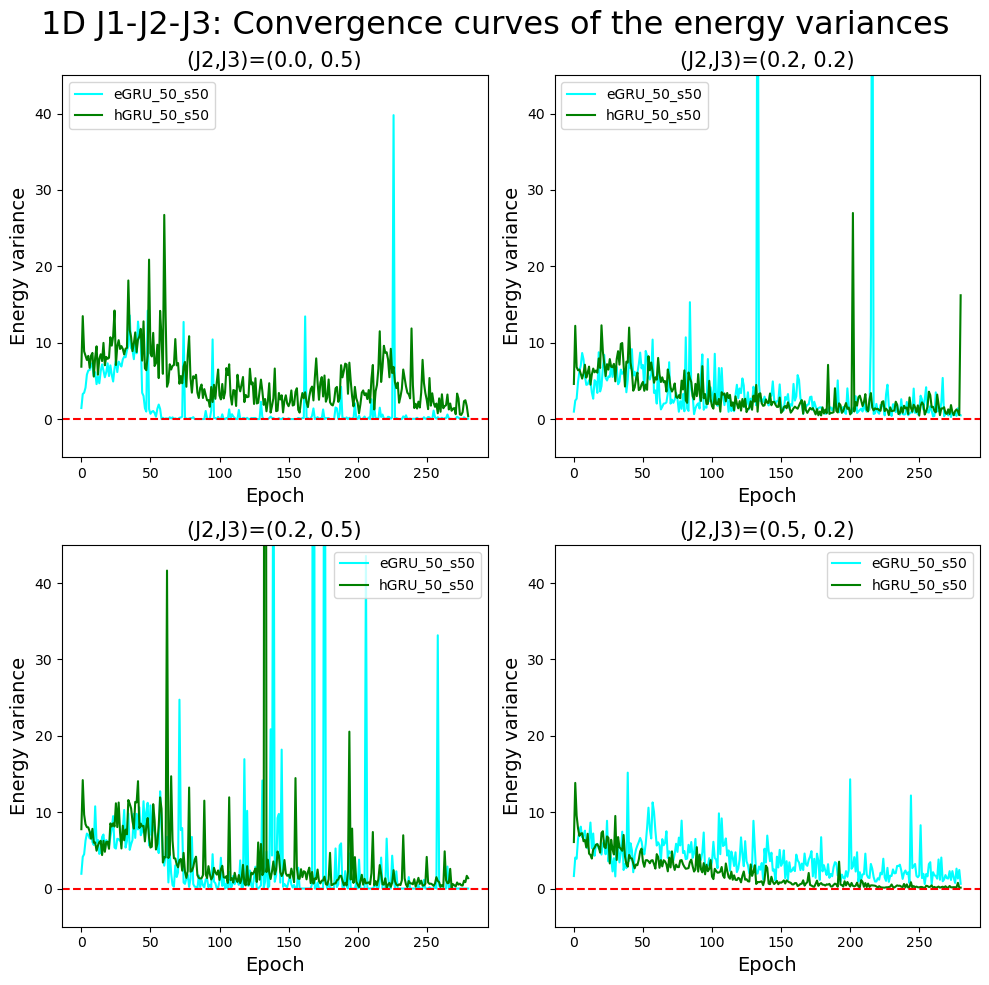

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10, 10), tight_layout=True)

e_names = ['eGRU_50_s50',  'hGRU_50_s50']
e_list00_05 = [vE00_05, vEh00_05]
e_list02_02 = [vE02_02, vEh02_02]
e_list02_05 = [vE02_05, vEh02_05]
e_list05_02 = [vE05_02, vEh05_02]

plot_res_var(ax[0,0], e_list00_05, e_names, [0.0, 0.5], [100,290, -0.5, 3.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[0,1], e_list02_02, e_names, [0.2,0.2], [100,290, -0.2, 3.], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,0],  e_list02_05, e_names, [0.2,0.5], [100,290, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1,1], e_list05_02, e_names, [0.5, 0.2], [100,290,-0.5, 2.5], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3: Convergence curves of the energy variances', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var.png')